<div id="container" style="position:relative;">
<div style="float:left"><h1> Owner: Asli Keser </h1></div>  
      <div style="clear:both;"></div> 
<div style="float:left"><h2> Unit3Deliverable#5 - NLP With Hotel Review - Q1 </h2></div>
<div style="position:relative; float:right">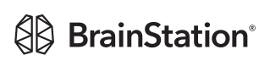
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

We are tasked with helping Hotel Management Inc. better understand what qualities of a hotel stay contribute to greater customer satisfaction and higher ratings. For this analysis, you are provided with a large data set consisting of hotel reviews (text fields for positive and negative comments) and details about the stay (hotel location, time & length of stay, etc). Your target column of interest is Reviewer_Score that encodes positive sentiment as 1 and negative as 0.

In [2]:
# Read in the csv to a DataFrame
df = pd.read_csv('Hotel_Reviews.csv')

In [3]:
# Print out the shape of the df
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the df.')

There are 515738 rows and 30 columns in the df.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [6]:
df.head(100)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,...,0,1,1,0,0,0,0,0,1,6
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,...,0,0,1,0,0,0,0,0,1,4
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,...,0,0,1,0,0,0,0,0,1,3
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,...,0,0,1,0,0,0,0,0,1,3
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,...,0,1,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,194,7.7,The work being done externally right now is o...,27,1403,Great room very comfortable bed Nice and quie...,97,1,1,...,0,0,1,0,0,0,0,0,1,3
96,96,194,7.7,No Negative,0,1403,We upgraded to a larger room Had the bath inf...,38,1,1,...,0,0,1,0,0,0,0,0,1,2
97,97,194,7.7,Our room was a little compact probably due to...,31,1403,A very quirky hotel that managed to keep its ...,29,2,1,...,0,0,1,0,0,0,0,0,1,4
98,98,194,7.7,Got charged 50 for a birthday package when it...,112,1403,No Positive,0,1,0,...,0,0,1,0,0,0,0,0,1,2


# Exploratory Data Analysis

1. Perform EDA on the data and mention 3-4 observations from which you can draw actionable insights. In your EDA, you may consider creating a data dictionary, basic statistical analysis, data visualizations, data cleaning and preprocessing to prepare the data for modeling.

## Data Cleaning

In [7]:
# Checking for duplicate columns
df.columns.duplicated().sum()

0

There are no duplicated column names.

In [8]:
# Checking for duplicate rows
df.duplicated().sum()

0

But, we need to be careful because this dataframe comes with its own index column that prevents us to see any duplicate rows. Therefore, we will drop 'Unnamed: 0' column and check if there is any duplicate rows.

In [9]:
df = df.drop(columns=df.columns[0]) #remove 'Unnamed:0' column

In [10]:
df.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


In [11]:
df.shape

(515738, 29)

In [12]:
df.duplicated().sum() # Checking for duplicate rows after removing 'Unnamed:0' column

539

There are 539 duplicate rows in this dataset.

In [13]:
df[df.duplicated()] #show duplicated rows

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
22084,83,8.3,Nothing,2,549,Good Service,3,5,1,0,...,0,1,0,0,0,0,1,0,0,4
23704,728,8.9,none,2,3168,good location and super nice staff room is bi...,13,39,1,159,...,0,1,0,0,1,0,0,0,0,1
61876,300,9.0,No Negative,0,1254,The attention received by Sebastian and his t...,12,4,1,7,...,0,1,0,0,1,0,0,0,1,2
68967,11,6.8,Location is very old not invested in past yea...,41,165,Location is central accessible by train parki...,12,24,0,41,...,0,1,0,0,0,0,1,0,0,1
68968,11,6.8,This hotel I don t think so is 4 star B B hav...,93,165,Nothing,2,10,0,98,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445869,251,8.8,Fitness club needs more tools,6,3667,No Positive,0,34,1,358,...,0,1,0,0,0,0,0,1,1,4
470439,493,9.0,No Negative,0,4192,Excellent,2,33,1,148,...,0,1,0,0,0,1,0,0,0,1
471973,311,8.3,Nothing,2,3720,Location and staff,4,20,0,718,...,0,0,0,0,0,1,0,0,1,2
489215,904,8.1,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,0,577,...,0,1,0,0,0,1,0,0,1,1


In [15]:
df = df.drop_duplicates().reset_index(drop=True) #drop duplicate rows and reset index

In [17]:
df.shape

(515199, 29)

In [18]:
# Checking for null values
df.isna().any()

Additional_Number_of_Scoring                  False
Average_Score                                 False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Days_Since_Review                             False
Latitude                                      False
Longitude                                     False
Day                                           False
Month                                         False
Year                                          False
Reviewer_Nationality_Australia                False
Reviewer_Nationality_Ireland                  False
Reviewer_Nationality_UAE                      False
Reviewer_Nationality_UK                       False
Reviewer_Nat

There are no null values to clean.

## Data Visualization

### Reviewer's Nationality vs Review Count

In [20]:
nationality = list(col for col in df.columns if "Nationality" in col)

In [22]:
nationality

['Reviewer_Nationality_Australia',
 'Reviewer_Nationality_Ireland',
 'Reviewer_Nationality_UAE',
 'Reviewer_Nationality_UK',
 'Reviewer_Nationality_USA',
 'Reviewer_Nationality_Other']

In [23]:
df[nationality]

,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
515194,0,0,0,0,0,1
515195,0,0,0,0,0,1
515196,0,0,0,0,0,1
515197,0,0,0,0,0,1


Text(0, 0.5, "Reviewer's Nationality")

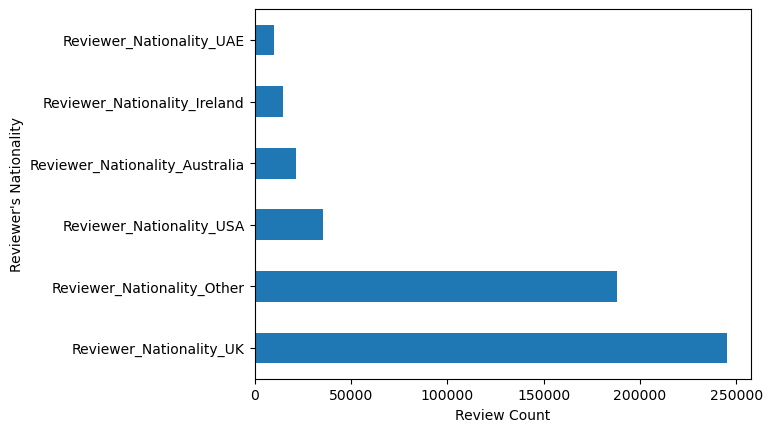

In [30]:
nat_plot=df[nationality].idxmax(axis=1).value_counts().plot(kind="barh")
nat_plot.set_xlabel("Review Count")
nat_plot.set_ylabel("Reviewer's Nationality")

Hotel Management Inc. primarily caters to guests from the UK. However, a significant challenge arises as nearly half of the reviewers' nationalities remain undisclosed within this dataset, hindering Hotel Management Inc.'s ability to gain valuable insights into the expectations of diverse nationalities. By incorporating a more diverse dropdown menu to capture this data, the hotel can broaden its understanding of guest preferences across various nationalities.

### Hotel's City vs Review Count

In [40]:
# list of columns whose column name contain "Hotel_Address"
city = list(col for col in df.columns if "Hotel_Address" in col)

In [41]:
city

['Hotel_Address_Amsterdam',
 'Hotel_Address_Barcelona',
 'Hotel_Address_London',
 'Hotel_Address_Milan',
 'Hotel_Address_Paris',
 'Hotel_Address_Vienna']

In [43]:
df[city] # convert to dataframe

,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
515194,0,0,0,0,0,1
515195,0,0,0,0,0,1
515196,0,0,0,0,0,1
515197,0,0,0,0,0,1


Text(0, 0.5, "Hotel's City")

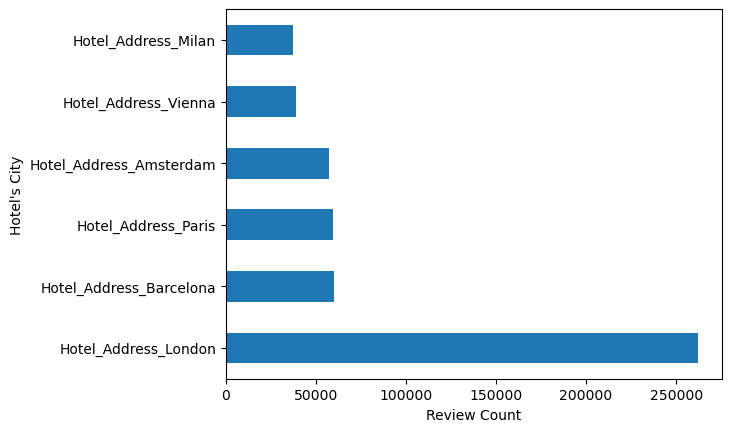

In [44]:
city_plot = df[city].idxmax(axis=1).value_counts().plot(kind="barh")
city_plot.set_xlabel("Review Count")
city_plot.set_ylabel("Hotel's City")

Not only most of the guests' nationality is UK, but also most of the reviews belong to the hotels located in London, UK.

### Positive and Negative Review Percentage

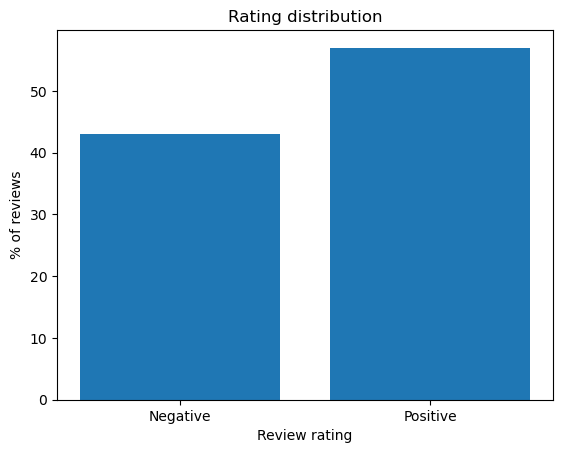

In [47]:
values, counts = np.unique(df['Reviewer_Score'], return_counts=True)
normalized_counts = counts/counts.sum()

values_str = np.where(values == 0,"Negative","Positive")

plt.figure()
plt.bar(values_str, normalized_counts * 100)
plt.xlabel('Review rating')
plt.ylabel('% of reviews')
plt.title("Rating distribution")
plt.show()

The dataframe exhibits a relatively balanced distribution of negative and positive review scores. Nevertheless, it's worth noting that there is a higher count of positive reviews compared to negative ones.

In [49]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,...,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000,515199.000000
mean,498.417604,8.397776,18.540711,2744.691424,17.778489,7.164750,0.570100,354.402120,49.433012,2.893915,...,0.068612,0.365010,0.111043,0.116747,0.509110,0.072209,0.115319,0.075573,0.810070,2.361750
std,500.673193,0.547947,29.693602,2318.112418,21.804665,11.039315,0.495062,208.909135,3.461933,4.669672,...,0.252794,0.481434,0.314185,0.321119,0.499917,0.258834,0.319406,0.264314,0.392246,1.646734
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


## Data Preparation

If a guest does not leave a positive review or a negative review, 'Positive_Review' and 'Negative_Review' columns are automatically filled with "No positive" and "No negative", respectively. This might lead to some issues for NLP since it is not a review written by a guest therefore it is misleading. 

In order to  adress this issue "No positive" and "No negative" texts will be relaced by _empty strings_.

In [50]:
is_cell_empty_str = (df.iloc[:, 5].str.strip() == 'No Positive')
is_cell_empty_str.sum()

35901

In __35901__ rows, 'Positive_Review' column was not filled by guest therefore "No positive" test was written automatically.

In [51]:
is_cell_empty_str = (df.iloc[:, 5].str.strip() == '')
is_cell_empty_str.sum()

182

In __182__ rows, 'Positive_Review' column was filled by guest with _whitespace_.

In [53]:
is_cell_empty_str = (df.iloc[:, 2].str.strip() == 'No Negative')
is_cell_empty_str.sum()

127755

In __127755__ rows, 'Negative_Review' column was not filled by guest therefore "No negative" test was written automatically.

In [54]:
is_cell_empty_str = (df.iloc[:, 2].str.strip() == '')
is_cell_empty_str.sum()

849

In __849__ rows, 'Negative_Review' column was filled by guest with _whitespace_.

In [56]:
# replace 'No Positive' in 'Positive_Review' column with empty string('')
df['Positive_Review'] = df['Positive_Review'].str.replace('No Positive','')

In [57]:
is_cell_empty_str = (df.iloc[:, 5].str.strip() == '')
is_cell_empty_str.sum()

36083

35901+182 = 36083 empty strings in 'Positive_Review' column.

In [58]:
# replace 'No Negative' in 'Negative_Review' column with empty string('')
df['Negative_Review'] = df['Negative_Review'].str.replace('No Negative','')

In [59]:
is_cell_empty_str = (df.iloc[:, 2].str.strip() == '')
is_cell_empty_str.sum()

128604

127755+849 = 128604 empty strings in 'Negative_Review' column.

In [61]:
# download my final dataframe as a csv file named as 'Hotel_Reviews_Clean.csv'
df.to_csv('Hotel_Reviews_Clean.csv', index=False)

If 'index=False' statement is not used in 'to_csv', index column named "Unnamed: 0" is added to the dataframe.